# <font color = 'yellow'><b>Linear Regression</b></font>

#### Linear Regression is the task of predicting the dependent variable based on the given independent variable/s, the dependent and independent variable/s should have linear relationship

<!-- 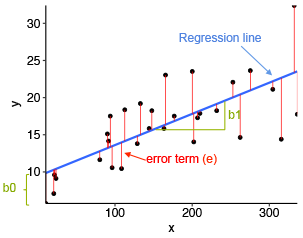 -->

<img src="linear-regression.png" alt="Image" width="500" height="400">


## <font color = 'yellow'><b>Simple Linear Regression:</b></font>

##### it is a method to predict the dependent variable (y) based on the independent variable (x). It is assumed that the two variables are linearly related. Hence, we  try to find the linear function that predicts the response value (y) as accurately as possible as a function of the feature or independent variable (x).

##### y = b0 + b1*x 
##### where y is the dependent variable we are trying to predict, x is the independent variable we are using to make predictions, b0 is the y-intercept, and b1 is the slope of the line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating random number generator
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 4 + rng.randn(50)

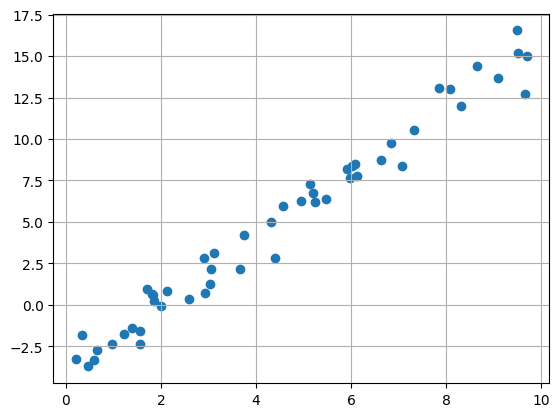

In [3]:
plt.scatter(x, y)
plt.grid(True)

In [4]:
# Importing the linear regression model
from sklearn.linear_model import LinearRegression

In [5]:
X = x[:, np.newaxis]

In [6]:
lr = LinearRegression(fit_intercept=True)

In [7]:
lr.fit(X, y)

LinearRegression()

In [8]:
xfit = np.linspace(0, 10, 1000)
Xfit = xfit[:, np.newaxis]
yfit = lr.predict(Xfit)

In [9]:
# yfit

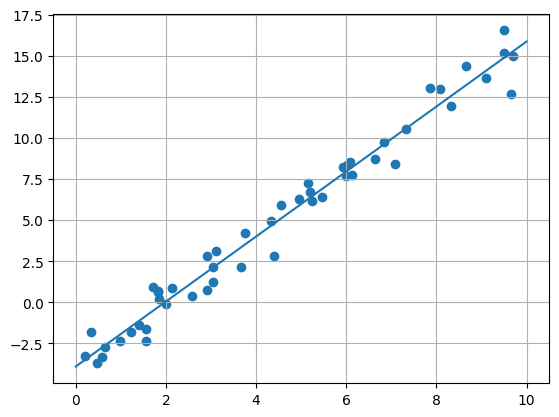

In [10]:
plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.grid(True)

In [11]:
print("Model slope: ", lr.coef_[0])
print("Model intercept: ", lr.intercept_)

Model slope:  1.9776566003853098
Model intercept:  -3.903310725531111


---

# <font color = 'sky-blue'><b>Linear Regression from Scratch</b></font>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax

In [13]:
df = pd.read_csv('data_for_lr.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_for_lr.csv'

In [ ]:
df.sample(5)

,x,y
122,7.0,4.075776
169,89.0,86.269724
462,2.0,1.576584
86,83.0,78.525051
478,29.0,26.655663


In [ ]:
df.shape

(700, 2)

In [ ]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Spliting the data into features and target

Xtrain = np.array(df['x'][0:500]).reshape(500, 1)
ytrain = np.array(df['y'][0:500]).reshape(500, 1)
Xtest = np.array(df['x'][500:]).reshape(199, 1)
ytest = np.array(df['y'][500:]).reshape(199, 1)

In [ ]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((500, 1), (500, 1), (199, 1), (199, 1))

### Forward propogation

In [ ]:
def forward_propogation(train_in, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m, train_in) + c
    return predictions

### Cost Function 

In [ ]:
# summation(1/n * (y - f(x))^2) 

def cost_func(predictions, train_out):
    cost = np.mean((train_out - predictions) ** 2)
    
    return cost
    

### Gradient Descent for Back Propogation

In [ ]:
# df = (f(x) - y)/n
# dm = df*X
# dc = df

In [ ]:
def backward_propogation(train_in, train_out, predictions):
    derivatives = dict()
    df = predictions - train_out
    dm = np.mean(np.multiply(df, train_in))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

### Updated parameters

m = m - (learning_rate * dm) 

c = c - (learning_rate * dc) 

In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']
    return parameters

In [ ]:
kxx

# <font color = 'light-brown'><b>Model Training</b></font>

In [ ]:
def train(train_in, train_out, learning_rate, iters):
    
    # Random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1)
    parameters['c'] = np.random.uniform(0, 1)
    
    plt.figure()
    # loss 
    loss = list()
    
    
    
    # iteration
    for i in range(iters):
        predictions = forward_propogation(train_in, parameters)
        
        # cost 
        cost = cost_func(predictions, train_out)
        loss.append(cost)
        print(f"Iteration: {i + 1}, Loss : {cost}")
        
        # plot
        fig, ax = plt.subplots()
        
        ax.plot(train_in, train_out, "+", label = "Original")
        ax.plot(train_in, predictions, "+", label = "Training")
        
        legend = ax.legend()
        
        plt.plot(train_in, train_out, "+", label = "Original")
        plt.plot(train_in, predictions, "+", label = "Training")
        plt.show()
        
        # back propogation
        derivatives = backward_propogation(train_in, train_out, predictions)
        
        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration: 1, Loss : 223.37822819729777


<Figure size 640x480 with 0 Axes>

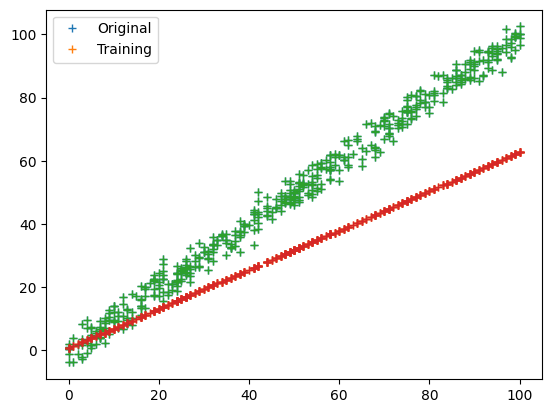

Iteration: 2, Loss : 103.54140439008653


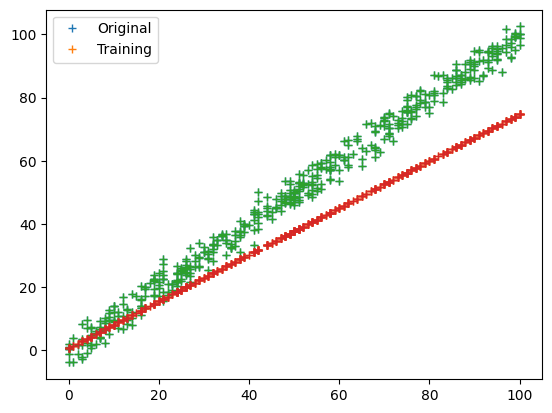

Iteration: 3, Loss : 49.171301759345326


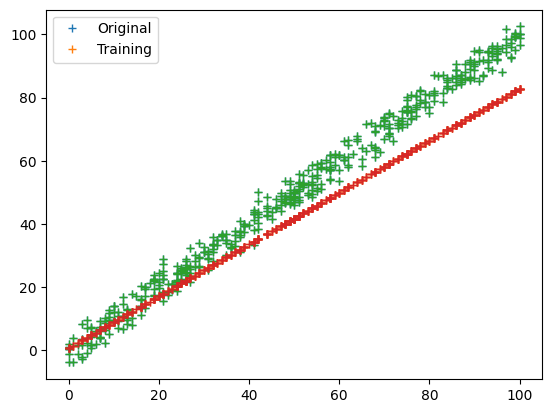

Iteration: 4, Loss : 24.50352304015484


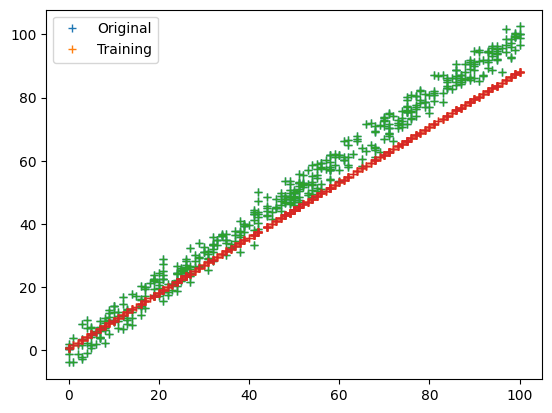

Iteration: 5, Loss : 13.31172157930081


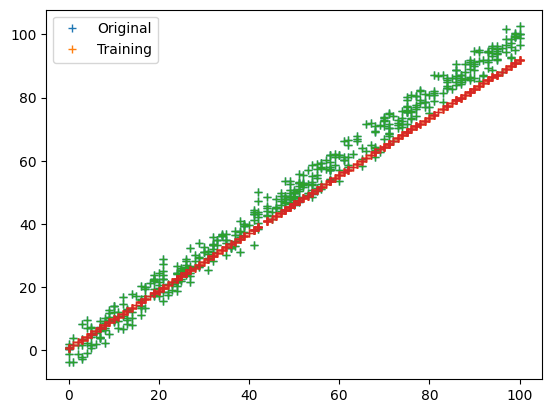

Iteration: 6, Loss : 8.23398592724957


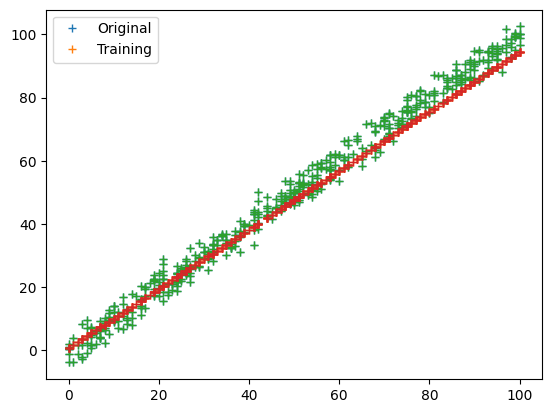

Iteration: 7, Loss : 5.930208704991182


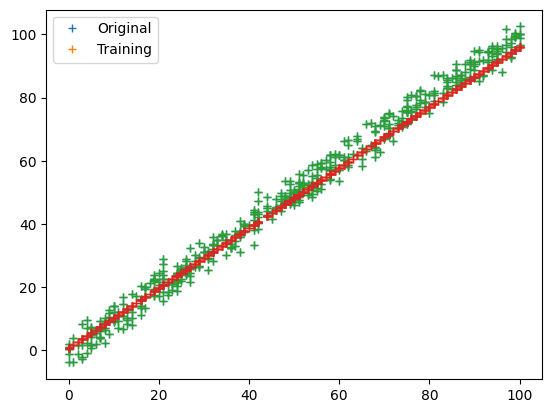

Iteration: 8, Loss : 4.884979495028201


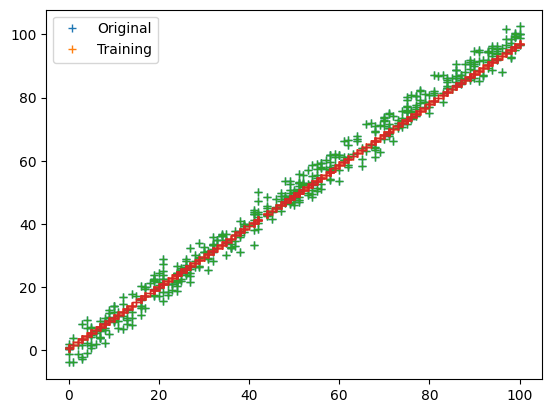

Iteration: 9, Loss : 4.410754912411017


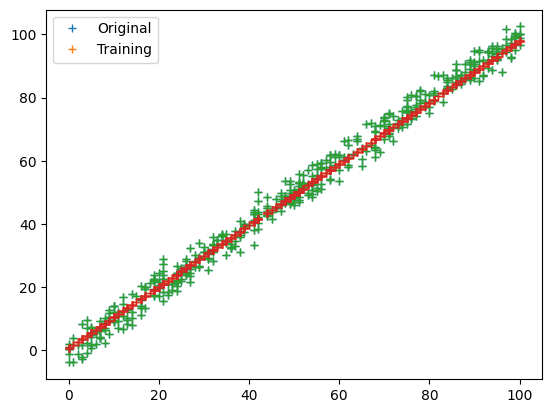

Iteration: 10, Loss : 4.19559576183659


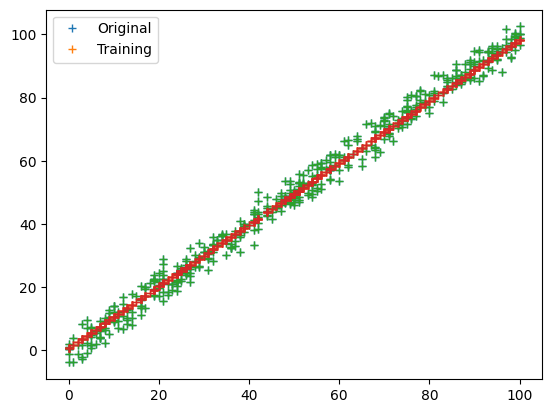

Iteration: 11, Loss : 4.097974884879217


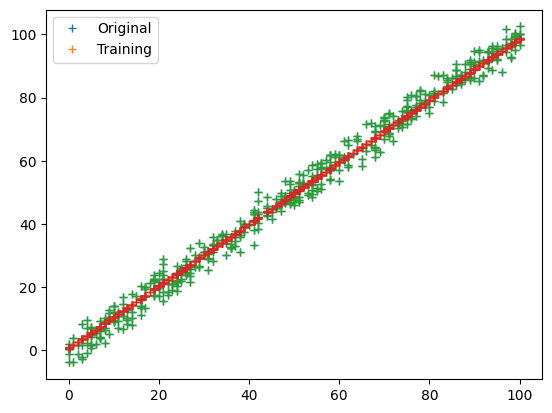

Iteration: 12, Loss : 4.053681252999832


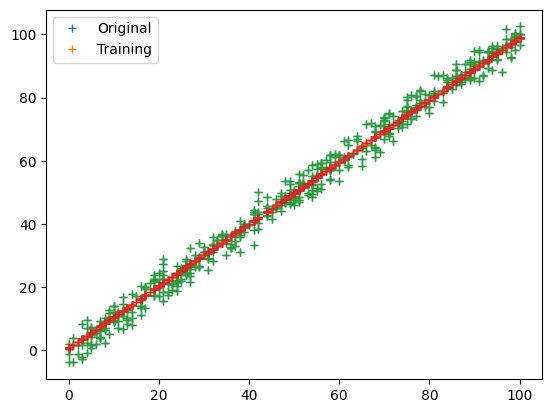

Iteration: 13, Loss : 4.033582251427471


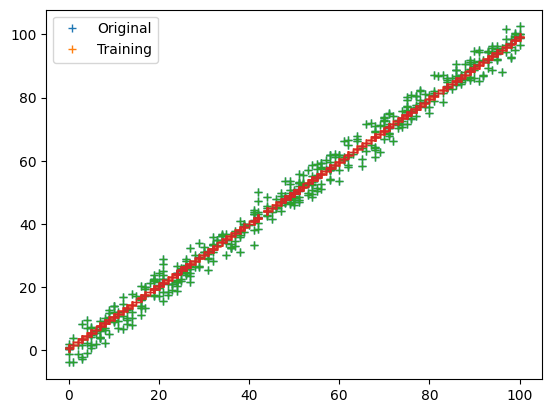

Iteration: 14, Loss : 4.02446038057206


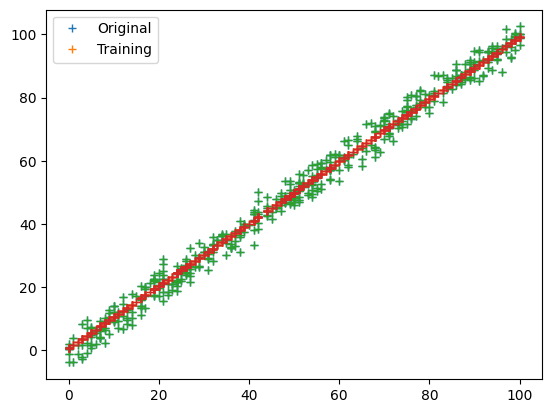

Iteration: 15, Loss : 4.020318846229324


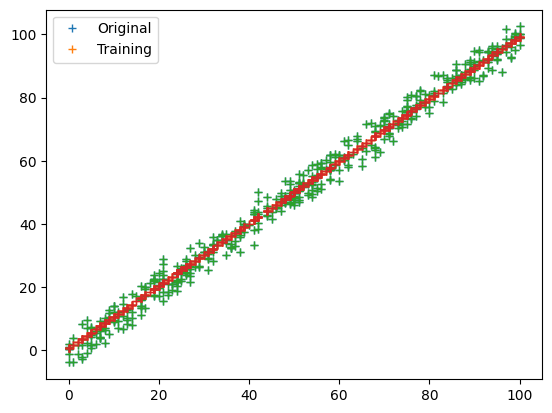

Iteration: 16, Loss : 4.018436896226477


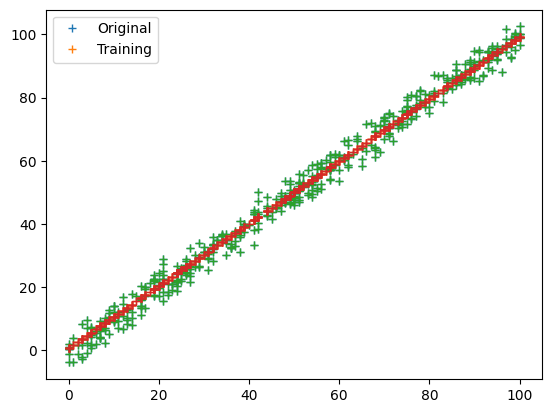

Iteration: 17, Loss : 4.017580122289111


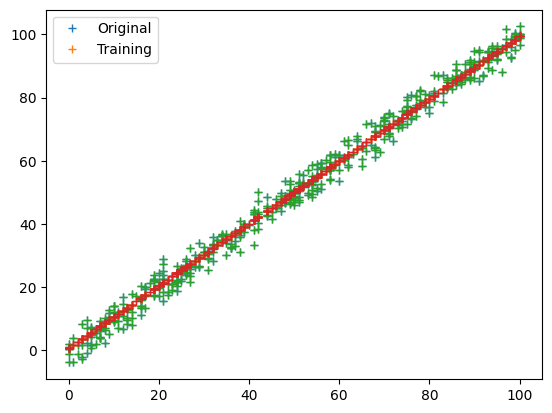

Iteration: 18, Loss : 4.017188472015828


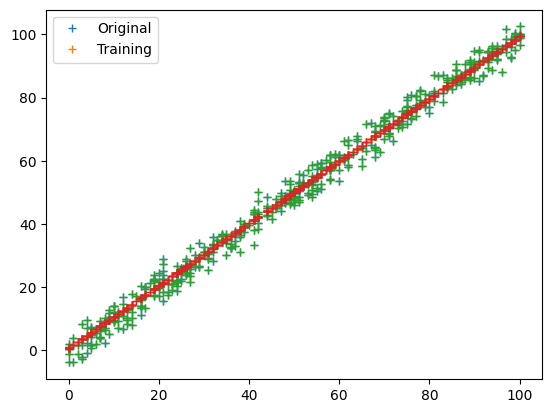

Iteration: 19, Loss : 4.017007849011775


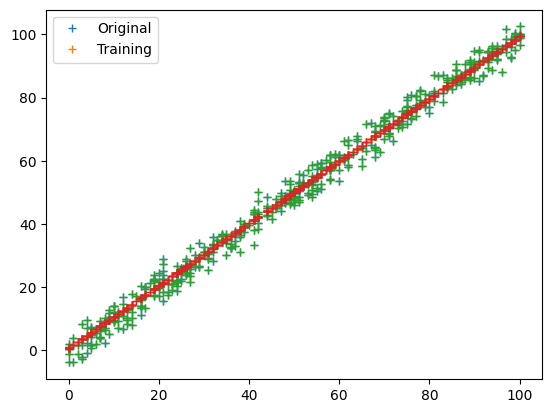

Iteration: 20, Loss : 4.016922969461149


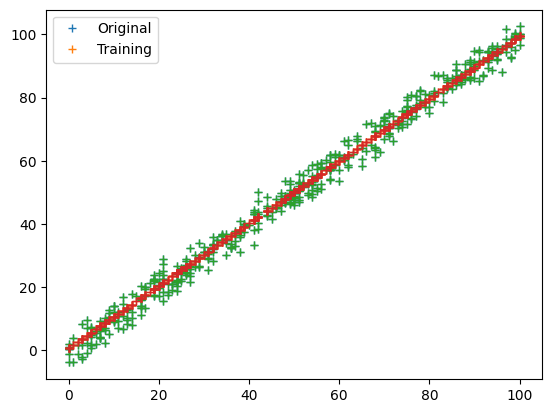

In [ ]:
parameters, loss = train(Xtrain, ytrain, 0.0001, 20 )

In [ ]:
parameters

{'m': 0.9869419873221114, 'c': 0.6834262132382476}

# Test prediction

In [ ]:
parameters, loss = train(Xtrain, ytrain, 0.0001, 20 )

In [ ]:
test_predictions = Xtest * parameters['m'] + parameters['c']

In [ ]:
test_predictions

array([[ 5.61813615],
       [60.88688744],
       [47.06969962],
       [97.40374097],
       [30.29168583],
       [62.86077141],
       [ 0.68342621],
       [99.37762495],
       [18.44838199],
       [30.29168583],
       [97.40374097],
       [16.47449801],
       [22.39614993],
       [54.96523552],
       [43.12193167],
       [74.70407526],
       [90.49514706],
       [46.08275763],
       [84.57349514],
       [54.96523552],
       [36.21333776],
       [49.04358359],
       [93.45597302],
       [43.12193167],
       [22.39614993],
       [37.20027974],
       [24.37003391],
       [94.44291501],
       [60.88688744],
       [74.70407526],
       [67.79548135],
       [57.92606148],
       [ 5.61813615],
       [52.99135154],
       [79.6387852 ],
       [82.59961116],
       [25.3569759 ],
       [34.23945378],
       [26.34391788],
       [89.50820507],
       [59.89994545],
       [49.04358359],
       [19.43532397],
       [91.48208905],
       [29.30474385],
       [ 8

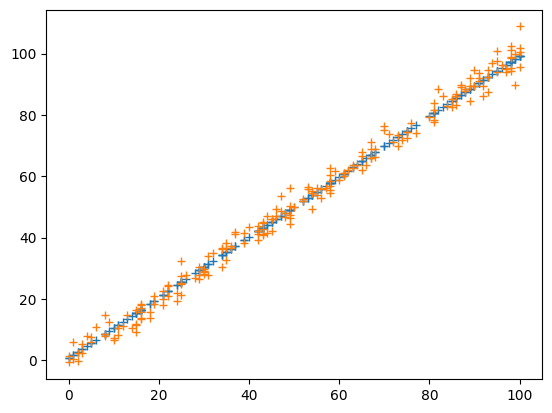

In [ ]:
plt.plot(Xtest, test_predictions, "+")
plt.plot(Xtest, ytest, "+")
plt.show()

In [ ]:
cost_func(Xtest, test_predictions)

0.07436644933510399